### 결정 트리 모델의 시각화 (Decision Tree Visualization)

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# DecisionTreeClassifierion 생성
dt_clf = DecisionTreeClassifier()

# 붓꽃 데이터를 로딩하고, 학습과 테스트 데이터 셋으로 분리
iris_data = load_iris()
X_train,X_test,y_train,y_test = train_test_split(iris_data.data,iris_data.target,test_size=0.2)

dt_clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [15]:
from sklearn.tree import export_graphviz

# export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성함
export_graphviz(dt_clf,out_file="tree.dot",class_names = iris_data.target_names,feature_names=iris_data.feature_names,impurity=True,filled=True)

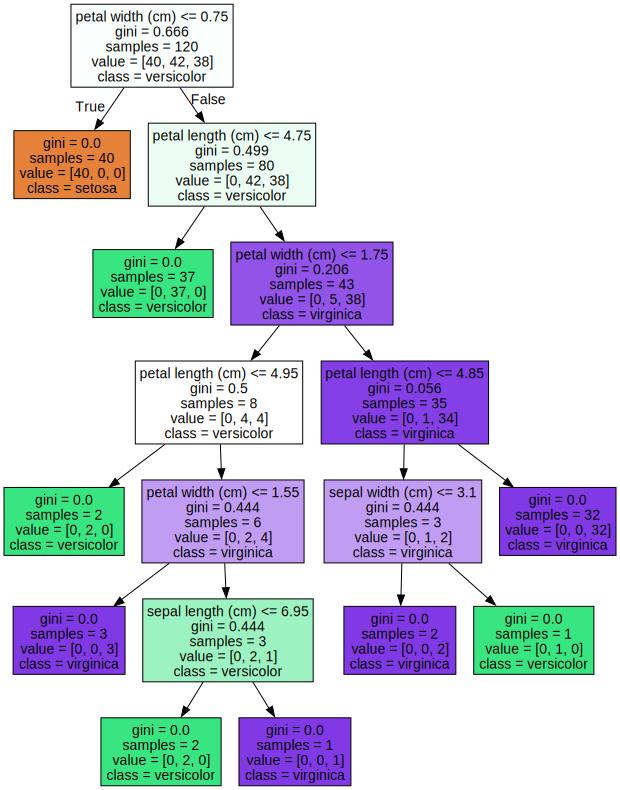

In [16]:
import graphviz
# 위에서 생선된 tree.dot 파일을 Graphviz 읽어서 Jupyter Notebook상에서 시각화
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

Feature importances : 
[0.017 0.017 0.413 0.554]
sepal length (cm) : 0.017
sepal width (cm) : 0.017
petal length (cm) : 0.413
petal width (cm) : 0.554


<Axes: >

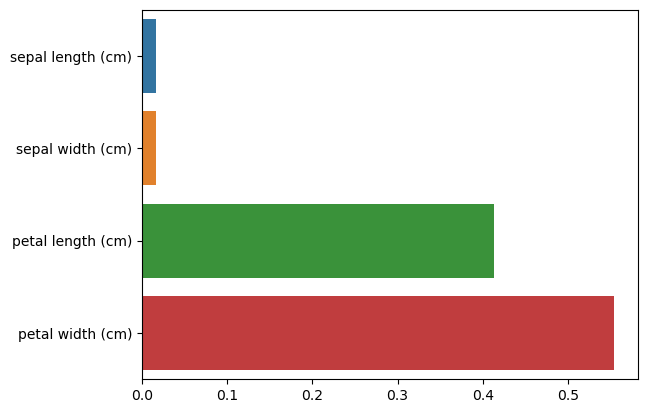

In [17]:
import seaborn as sns 
import numpy as np
%matplotlib inline 

# feature importance 추출
print("Feature importances : \n{0}".format(np.round(dt_clf.feature_importances_,3)))

# feature 별 importance 매핑
for name,value in zip(iris_data.feature_names,dt_clf.feature_importances_):
    print('{0} : {1:.3f}'.format(name,value))
    
# feature importance를 columns 별로 시각화 하기
sns.barplot(x=dt_clf.feature_importances_,y=iris_data.feature_names)

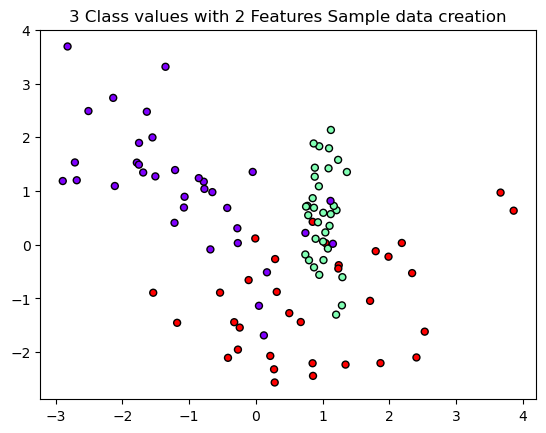

In [21]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt 

plt.title("3 Class values with 2 Features Sample data creation")

# 2차원 시각화를 위해서 feature는 2개 결정값 클래스는 3가지 유형의 classification 샘플 데이터 생성
X_features,y_labels = make_classification(n_features=2,n_redundant=0,n_informative=2,n_classes=3,n_clusters_per_class=1,random_state=0)

# plot 형태로 2개의 featurefh 2차원 좌표 시각화, 각 클래스 값은 다른색깔로 표시됨.
plt.scatter(X_features[:,0],X_features[:,1],marker='o',c=y_labels,s=25,cmap='rainbow',edgecolors='k')

In [22]:
import numpy as np

# Classifier의 Decision Boundary를 시각화 하는 함수 
def visualize_boundary(model,X,y):
    fig,ax=plt.subplots()
    
    # 학습 데이터 scatter plot으로 나타내기 
    ax.scatter(X[:,0],X[:,1],c=y,s=25,cmap='rainbow',edgecolor='k',clim=(y.min(),y.max()),zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start,xlim_end=ax.get_xlim()
    ylim_start,ylim_end=ax.get_ylim()
    
    # 호출 파라미터로 들어온 training데이터로 model 학습
    model.fit(X,y)
    #meshgrid 형태인 모든 좌표값으로 예측 수행
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # contourf() 를 이용하여 class boundary 를 visualization 수행. 
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)

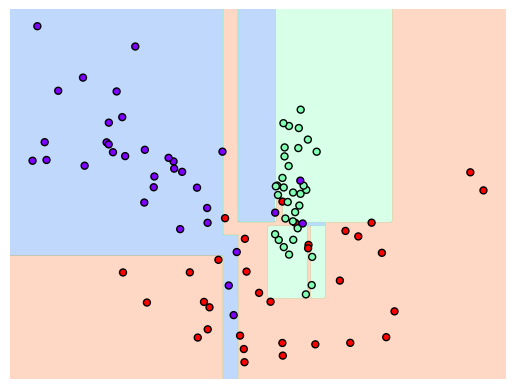

In [23]:
from sklearn.tree import DecisionTreeClassifier

# 특정한 트리 생성 제약없는 결정 트리의 Decision Boundary 시각화
dt_clf = DecisionTreeClassifier(random_state=156).fit(X_features,y_labels)
visualize_boundary(dt_clf,X_features,y_labels)

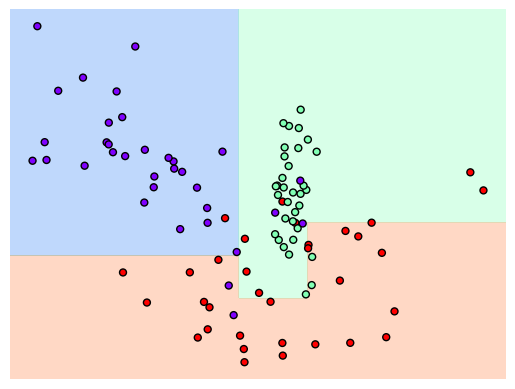

In [24]:
# min_samples_leaf=6으로 트리 생성 조건을 제약한 Decision Boundary시각화
dt_clf = DecisionTreeClassifier(random_state=156,min_samples_leaf=6).fit(X_features,y_labels)
visualize_boundary(dt_clf,X_features,y_labels)

### 결정 트리 실습 - Human Activity Recognition

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# feature.txt파일에는 피처이름 index와 피처명이 공백으로 분리되어있음.이를 DataFrame으로 로드
feature_name_df = pd.read_csv('./human_activity/features.txt',sep='\s+',header=None,names=['column_index','column_name'])

# 피처명 index를 제거하고, 피처명만 리스트 객체로 생성한 뒤 샘플로 10개만 추출
feature_name =feature_name_df.iloc[:,1].values.tolist()
print('전체 피처명에서 10개만 추출 :',feature_name[:10])

전체 피처명에서 10개만 추출 : ['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X']


In [27]:
feature_name_df

,column_index,column_name
0,1,tBodyAcc-mean()-X
1,2,tBodyAcc-mean()-Y
2,3,tBodyAcc-mean()-Z
3,4,tBodyAcc-std()-X
4,5,tBodyAcc-std()-Y
...,...,...
556,557,"angle(tBodyGyroMean,gravityMean)"
557,558,"angle(tBodyGyroJerkMean,gravityMean)"
558,559,"angle(X,gravityMean)"
559,560,"angle(Y,gravityMean)"


#### 중복된 피처명을 확인

In [26]:
feature_dup_df = feature_name_df.groupby('column_name').count()
feature_dup_df

,column_index
column_name,
"angle(X,gravityMean)",1
"angle(Y,gravityMean)",1
"angle(Z,gravityMean)",1
"angle(tBodyAccJerkMean),gravityMean)",1
"angle(tBodyAccMean,gravity)",1
...,...
tGravityAccMag-max(),1
tGravityAccMag-mean(),1
tGravityAccMag-min(),1


In [28]:
feature_dup_df = feature_name_df.groupby('column_name').count()
print(feature_dup_df[feature_dup_df['column_index']>1].count())
feature_dup_df[feature_dup_df['column_index']>1].head(10)

column_index    42
dtype: int64


,column_index
column_name,
"fBodyAcc-bandsEnergy()-1,16",3
"fBodyAcc-bandsEnergy()-1,24",3
"fBodyAcc-bandsEnergy()-1,8",3
"fBodyAcc-bandsEnergy()-17,24",3
"fBodyAcc-bandsEnergy()-17,32",3
"fBodyAcc-bandsEnergy()-25,32",3
"fBodyAcc-bandsEnergy()-25,48",3
"fBodyAcc-bandsEnergy()-33,40",3
"fBodyAcc-bandsEnergy()-33,48",3


#### 원본 데이터에 중복된 feature명으로 인하여 신규 버전의 Pandas에서 Duplicate name에러를 발생. 중복 feature명에 대해서 원본 feature명에 '1(또는 2)'를 추가로 부여하는 함수인 get_new_feature_name_df()생성

In [34]:
def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(),
                                  columns=['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x : x[0]+'_'+str(x[1]) 
                                                                                         if x[1] >0 else x[0],  axis=1)
    new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
    return new_feature_name_df

In [35]:
df = pd.DataFrame([['a'], ['a'], ['a'], ['b'], ['b'], ['a']], columns=['A'])
display(df)
df.groupby('A').cumcount()

,A
0,a
1,a
2,a
3,b
4,b
5,a


0    0
1    1
2    2
3    0
4    1
5    3
dtype: int64

In [36]:
import pandas as pd

def get_human_dataset( ):
    
    # 각 데이터 파일들은 공백으로 분리되어 있으므로 read_csv에서 공백 문자를 sep으로 할당.
    feature_name_df = pd.read_csv('./human_activity/features.txt',sep='\s+',
                        header=None,names=['column_index','column_name'])
    
    # 중복된 피처명을 수정하는 get_new_feature_name_df()를 이용, 신규 피처명 DataFrame생성. 
    new_feature_name_df = get_new_feature_name_df(feature_name_df)
    
    # DataFrame에 피처명을 컬럼으로 부여하기 위해 리스트 객체로 다시 변환
    feature_name = new_feature_name_df.iloc[:, 1].values.tolist()
    
    # 학습 피처 데이터 셋과 테스트 피처 데이터을 DataFrame으로 로딩. 컬럼명은 feature_name 적용
    X_train = pd.read_csv('./human_activity/train/X_train.txt',sep='\s+', names=feature_name )
    X_test = pd.read_csv('./human_activity/test/X_test.txt',sep='\s+', names=feature_name)
    
    # 학습 레이블과 테스트 레이블 데이터을 DataFrame으로 로딩하고 컬럼명은 action으로 부여
    y_train = pd.read_csv('./human_activity/train/y_train.txt',sep='\s+',header=None,names=['action'])
    y_test = pd.read_csv('./human_activity/test/y_test.txt',sep='\s+',header=None,names=['action'])
    
    # 로드된 학습/테스트용 DataFrame을 모두 반환 
    return X_train, X_test, y_train, y_test


X_train, X_test, y_train, y_test = get_human_dataset()

In [37]:
print('## 학습 피처 데이터셋 info()')
print(X_train.info())

## 학습 피처 데이터셋 info()
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 31.5 MB
None


In [38]:
print(y_train['action'].value_counts())

6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: action, dtype: int64


In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train,y_train)
pred = dt_clf.predict(X_test)
accuarcy = accuracy_score(y_test,pred)
print('결정 트리 예측 정확도 : {0:.4f}'.format(accuarcy))

# DecisionTreeClassifier의 하이퍼 파라미터 추출
print('DecisionTreeClassifier기본 하이퍼 파리미터 :\n ',dt_clf.get_params())

결정 트리 예측 정확도 : 0.8588
DecisionTreeClassifier기본 하이퍼 파리미터 :
  {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}


In [42]:
from sklearn.model_selection import GridSearchCV
params = {
    'max_depth' : [6,8,10,12,16,20,24],
    'min_samples_split' : [16]
}

grid_cv = GridSearchCV(dt_clf,param_grid=params,scoring='accuracy',cv=5,verbose=1)
grid_cv.fit(X_train,y_train)
print('GridSearchCV 최고 평균 정확도 수치 : {0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최고 하이퍼 파라미터 : ',grid_cv.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
GridSearchCV 최고 평균 정확도 수치 : 0.8513
GridSearchCV 최고 하이퍼 파라미터 :  {'max_depth': 6, 'min_samples_split': 16}


In [44]:
# GridSearchCV객체의 cv_results_속성을 DataFrame으로 생성
cv_results_df = pd.DataFrame(grid_cv.cv_results_)
# max_depth 파라미터 값과 그때의 테스트 셋 ,학습 데이터 셋의 정확도 수치 추출
cv_results_df[['param_max_depth','mean_test_score']]

,param_max_depth,mean_test_score
0,6,0.851336
1,8,0.850932
2,10,0.848485
3,12,0.847944
4,16,0.842094
5,20,0.848488
6,24,0.845358


In [56]:
max_depths = [ 6, 8 ,10, 12, 16 ,20, 24]
# max_depth 값을 변화 시키면서 그때마다 학습과 테스트 셋에서의 예측 성능 측정
for depth in max_depths:
    dt_clf = DecisionTreeClassifier(max_depth=depth,min_samples_split=16)
    dt_clf.fit(X_train,y_train)
    pred=dt_clf.predict(X_test)
    accuracy = accuracy_score(y_test,pred)
    print('max_depth={0} 정확도 : {1:.4f}'.format(depth,accuracy))
    

max_depth=6 정확도 : 0.8554
max_depth=8 정확도 : 0.8731
max_depth=10 정확도 : 0.8666
max_depth=12 정확도 : 0.8660
max_depth=16 정확도 : 0.8602
max_depth=20 정확도 : 0.8626
max_depth=24 정확도 : 0.8578


In [48]:
params = {
    'max_depth' : [8,12,16,20],
    'min_samples_split' : [16,24]
}

grid_cv = GridSearchCV(dt_clf,param_grid=params,scoring='accuracy',cv=5,verbose=1)
grid_cv.fit(X_train,y_train)
print('GridSearchCV 최고 평균 정확도 수치 : {0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최고 하이퍼 파라미터 : ',grid_cv.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
GridSearchCV 최고 평균 정확도 수치 : 0.8575
GridSearchCV 최고 하이퍼 파라미터 :  {'max_depth': 8, 'min_samples_split': 16}


In [57]:
best_df_clf = grid_cv.best_estimator_
pred1 = best_df_clf.predict(X_test)
accuracy = accuracy_score(y_test,pred1)
print('결정 트리 예측 정확도 : {0:.4f}'.format(accuracy))


결정 트리 예측 정확도 : 0.8724


In [55]:
ftr_importances_values = best_df_clf.feature_importances_
ftr_importances =pd.Series(ftr_importances_values,index=X_train.columns)
ftr_importances.sort_values(ascending=False)

tGravityAcc-min()-X                0.253354
fBodyAccJerk-bandsEnergy()-1,24    0.214038
angle(Y,gravityMean)               0.139001
fBodyAccMag-energy()               0.115478
tGravityAcc-arCoeff()-Z,2          0.101548
                                     ...   
tBodyGyroJerk-arCoeff()-Z,3        0.000000
tBodyGyroJerk-arCoeff()-Z,2        0.000000
tBodyGyroJerk-arCoeff()-Z,1        0.000000
tBodyGyroJerk-arCoeff()-Y,4        0.000000
fBodyAcc-sma()                     0.000000
Length: 561, dtype: float64

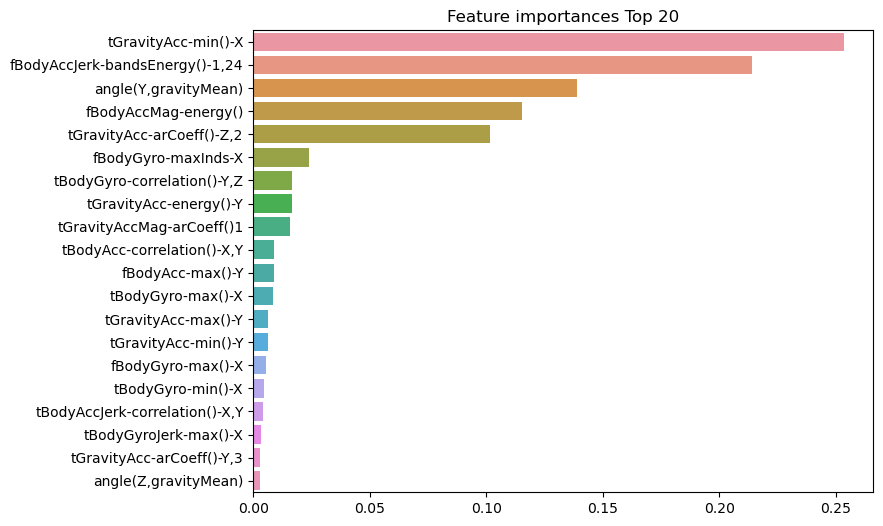

In [59]:
import seaborn as sns
ftr_importances_values =best_df_clf.feature_importances_
# Top 중요도로 정렬을 쉽게 하고, 시본의 막대그래프로 쉽게 표현하기 위해 Series변환
ftr_importances=pd.Series(ftr_importances_values,index=X_train.columns)
# 중요도 값 순으로 Series를 정렬
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]
plt.figure(figsize=(8,6))
plt.title("Feature importances Top 20")
sns.barplot(x=ftr_top20,y=ftr_top20.index)
plt.show()